In [1]:
from sklearn.datasets import make_regression
import pandas as pd
import numpy as np

import plotly.express as px              # for visualizations
import plotly.graph_objects as go

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [3]:
# creating a dataset

X,y = make_regression(n_samples=100, n_features=2, n_informative=2, n_targets=1, noise=50)

In [5]:
# converting it to df
df = pd.DataFrame({'feature1':X[:,0],'feature2':X[:,1],'target':y})

In [6]:
df.shape

(100, 3)

In [7]:
df.head()

,feature1,feature2,target
0,0.563492,-0.740133,-47.942376
1,0.414686,0.334047,107.846410
2,0.148566,-0.879857,-81.039876
3,-1.553265,-1.128330,-219.048953
4,0.127401,-2.014488,-22.750390


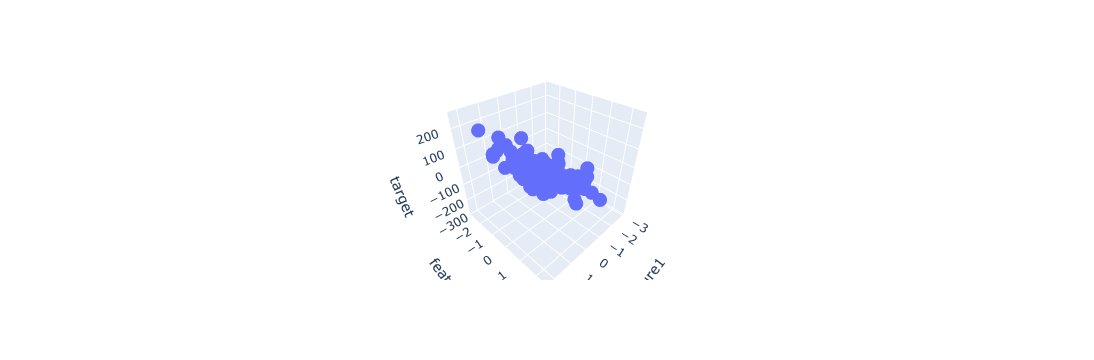

In [8]:
# plotting the points in 3d

fig = px.scatter_3d(df, x='feature1', y='feature2', z='target')

fig.show()

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=3)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lr = LinearRegression()

In [12]:
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
y_pred = lr.predict(X_test)

In [14]:
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("R2 score",r2_score(y_test,y_pred))

MAE 38.73531704326333
MSE 2466.125334577123
R2 score 0.8332976959935235


In [23]:
# visualizing the plane

x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)
xGrid, yGrid = np.meshgrid(y, x)
final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)
z = z_final

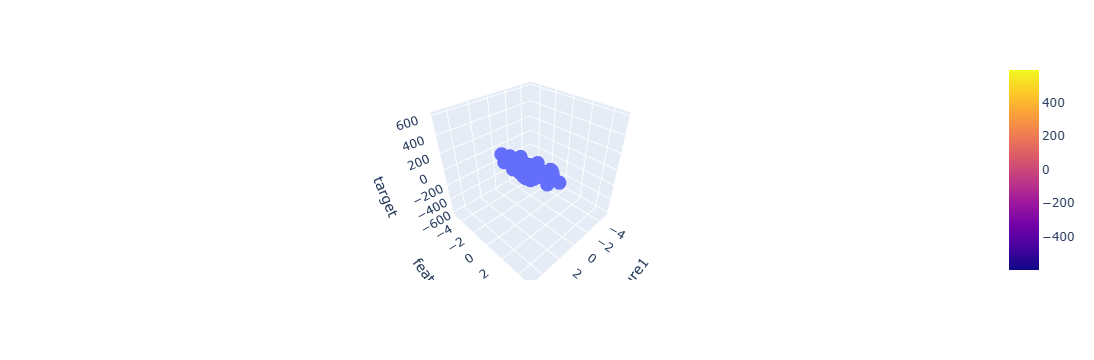

In [24]:
fig = px.scatter_3d(df, x='feature1', y='feature2', z='target')

fig.add_trace(go.Surface(x = x, y = y, z =z ))

fig.show()

In [25]:
lr.coef_

array([95.48716649, 23.65404084])

In [26]:
lr.intercept_

np.float64(-2.0704204064189238)